In [3]:
import pandas as pd
import numpy as np
from fooof import FOOOF
import os
wd = os.getcwd()

ModuleNotFoundError: No module named 'fooof'

In [3]:
def flatten_psd(tested_freqs, elec_psd, freq_range = [2, 25]):
    """Flatten the power spectral density using the FOOOF algorithm.

    Args:
        tested_freqs: An array containing the frequencies of interest.
        elec_psd: An array containing the original electrode power spectral density.

    Returns:
        results: A dictionary containing the flat spectrum, offset, slope, peak parameters, guassian parameters,
         FOOOFED spectra, R2 and the error.
    """
    e = FOOOF()
    # Add data to FOOOF object
    e.add_data(tested_freqs, elec_psd, freq_range)
    e.fit(tested_freqs, elec_psd, freq_range)

    results = dict()
    results['tested_Frequencies'] = tested_freqs
    results['flat_Spectrum'] = e._peak_fit
    results['Offset'] = e.aperiodic_params_[0]
    results['Slope'] = e.aperiodic_params_[1] # Exponent
    results['PeakParams'] = e.peak_params_
    results['GaussianParams'] = e.gaussian_params_
    results['Foofed'] = e.fooofed_spectrum_
    results['R2'] = e.r_squared_
    results['OError'] = e.error_

    return results

In [4]:
data = pd.read_csv('data_EEG_MASTER4.csv')
data.head()

,subID,group,time,block,block_num,Hz,Fp1,Fp2,AF7,AF3,...,Right_Ear,P3,Pz,P4,O1,O2,Frontal,Central,Parietal,Occipital
0,a01,self,rest,pretest,0.0,0.977,23.6754,27.7804,46.3578,23.9450,...,2.8420,41.7802,65.0590,43.9270,31.2956,28.8505,18.587629,37.140200,50.255400,30.07305
1,a01,self,rest,pretest,0.0,1.954,3.9196,3.6038,6.3647,3.9597,...,0.8097,10.6234,13.5154,10.8973,11.0657,10.7553,3.563929,7.955167,11.678700,10.91050
2,a01,self,rest,pretest,0.0,2.931,1.5909,1.4150,2.2420,1.6119,...,0.4084,4.2806,5.1967,4.1678,5.2266,4.8213,1.492843,3.099033,4.548367,5.02395
3,a01,self,rest,pretest,0.0,3.908,1.3280,1.1134,1.5488,1.3451,...,0.3786,2.5214,3.0651,2.2858,2.5946,2.5101,1.182386,2.401100,2.624100,2.55235
4,a01,self,rest,pretest,0.0,4.885,1.2502,1.0312,1.3729,1.2652,...,0.3149,2.2614,2.8087,2.0862,2.0977,1.9925,1.084657,2.260367,2.385433,2.04510


# Run the FOOOF Model

In [5]:
# Filer data for one subject and block
subset_subject = data[data['subID']=='a01']
subset = subset_subject[subset_subject['block']=='pretest']

In [6]:
e = FOOOF()
freq_range = [2, 25]
tested_freqs = np.array(subset['Hz'])
elec_psd = np.array(subset['Central']) # Frontal

e.report(tested_freqs, elec_psd, freq_range)

NameError: name 'FOOOF' is not defined

# Collect the Parameters from one Power Spectral Density

In [6]:
e.add_data(tested_freqs, elec_psd, freq_range)
e.fit(tested_freqs, elec_psd, freq_range)
results = dict()
results['tested_Frequencies'] = tested_freqs
results['flat_Spectrum'] = e._peak_fit
results['Offset'] = e.aperiodic_params_[0]
results['Slope'] = e.aperiodic_params_[1]
results['PeakParams'] = e.peak_params_
results['GaussianParams'] = e.gaussian_params_
results['Foofed'] = e.fooofed_spectrum_
results['R2'] = e.r_squared_
results['OError'] = e.error_


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



In [7]:
e.aperiodic_params_

array([1.27576043, 1.49954333])

In [8]:
e.gaussian_params_

array([[11.72599977,  0.43238529,  2.54967987]])

# Plot an Updated FOOOF diagram

In [9]:
rest_data = data[data['time']=='rest']
rest_data

,subID,group,time,block,block_num,Hz,Fp1,Fp2,AF7,AF3,...,Right_Ear,P3,Pz,P4,O1,O2,Frontal,Central,Parietal,Occipital
0,a01,self,rest,pretest,NaN,0.977,23.6754,27.7804,46.3578,23.9450,...,2.8420,41.7802,65.0590,43.9270,31.2956,28.8505,18.587629,37.140200,50.255400,30.07305
1,a01,self,rest,pretest,NaN,1.954,3.9196,3.6038,6.3647,3.9597,...,0.8097,10.6234,13.5154,10.8973,11.0657,10.7553,3.563929,7.955167,11.678700,10.91050
2,a01,self,rest,pretest,NaN,2.931,1.5909,1.4150,2.2420,1.6119,...,0.4084,4.2806,5.1967,4.1678,5.2266,4.8213,1.492843,3.099033,4.548367,5.02395
3,a01,self,rest,pretest,NaN,3.908,1.3280,1.1134,1.5488,1.3451,...,0.3786,2.5214,3.0651,2.2858,2.5946,2.5101,1.182386,2.401100,2.624100,2.55235
4,a01,self,rest,pretest,NaN,4.885,1.2502,1.0312,1.3729,1.2652,...,0.3149,2.2614,2.8087,2.0862,2.0977,1.9925,1.084657,2.260367,2.385433,2.04510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105539,l30,yoked,rest,posttest,NaN,74.252,0.0031,0.0042,0.0025,0.0030,...,0.0001,0.0004,0.0004,0.0004,0.0004,0.0004,0.001586,0.000667,0.000400,0.00040
105540,l30,yoked,rest,posttest,NaN,75.229,0.0021,0.0029,0.0017,0.0020,...,0.0001,0.0003,0.0003,0.0003,0.0002,0.0003,0.001071,0.000433,0.000300,0.00025
105541,l30,yoked,rest,posttest,NaN,76.206,0.0017,0.0022,0.0014,0.0016,...,0.0001,0.0002,0.0002,0.0002,0.0002,0.0002,0.000871,0.000367,0.000200,0.00020
105542,l30,yoked,rest,posttest,NaN,77.183,0.0016,0.0020,0.0013,0.0014,...,0.0001,0.0002,0.0002,0.0002,0.0002,0.0002,0.000829,0.000367,0.000200,0.00020


In [10]:
averaged_data = rest_data.groupby(['Hz']).mean()
averaged_data[['Central']]

,Central
Hz,
0.977,59.634185
1.954,10.475816
2.931,4.968331
3.908,3.358827
4.885,2.465242
...,...
74.252,0.000386
75.229,0.000322
76.206,0.000252


# Averaged FOOOF Data Across Central


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 25 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

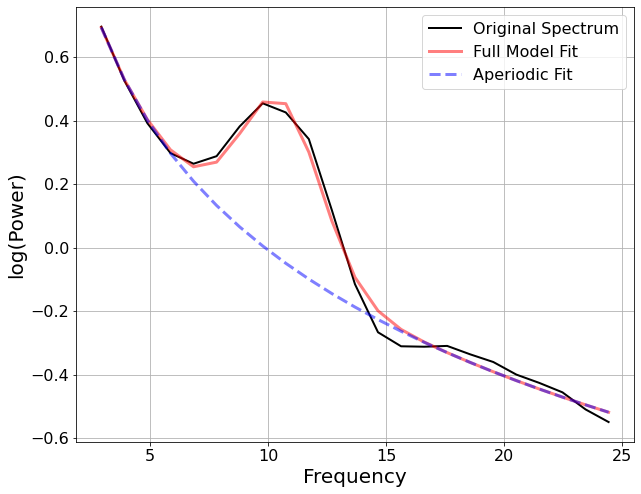

In [11]:
ave = FOOOF()
freq_range = [2, 25]
tested_freqs = np.array(subset['Hz'])
elec_psd = np.array(averaged_data['Central']) # Frontal

ave.report(tested_freqs, elec_psd, freq_range)

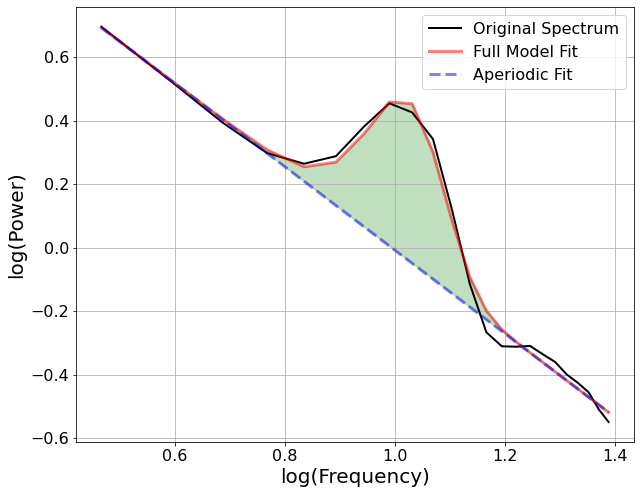

In [12]:
# Plot an example power spectrum, with a model fit
ave.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, plt_log=True)

In [15]:
asubjects = list(range(1, 31)) # 1-31
asubjects.pop(24)
isubjects = list(range(1, 31)) # 1-31
blocks = range(1,21)
freq_range = [2,26] # 2,26
areas = ['Frontal', 'Central', 'Parietal', 'Occipital'] # 'Frontal', 'Central', 'Parietal', 'Occipital'
conditions = ['prac','rest'] # 'prac', 'rest'
test_type = ['pretest', 'posttest'] # 'pretest', 'posttest'
subject_type = ['a', 'l'] # 'a', 'l'

subject_array, block_array, condition, group_array, area_array = [], [], [], [], []
R2_array, slope_array, offset_array = [], [], []
range_array = []

# Load the data
data = pd.read_csv('data_EEG_MASTER4.csv')

output_results = dict()
for group in subject_type:
    if group == 'a':
        subjects = asubjects
    else:
        subjects = isubjects

    for subject in subjects:
        subject_results = dict()
        subject_name = 'S' + str(subject)
        print('Partcipant:', subject)
        subID = group+str(subject).zfill(2)
        tmp = data[data['subID']==subID]
        
        for area in areas:
            for this_condition in conditions:
                tmp_data = tmp[tmp['time'] == this_condition]
                if this_condition == 'prac':

                    for block in blocks:
                        block_results = dict()
                        block_array.append('b' + str(block).zfill(2))
                        current_data = tmp_data[tmp_data['block_num']==block]
                        subject_array.append(subject)
                        condition.append(this_condition) # Pre, Post
                        group_array.append(group)
                        area_array.append(area)
                        range_array.append(str(freq_range[0])+'-'+str(freq_range[1]))
                        area_results = dict()
                        elec_psd = np.array(current_data[area])
                        tested_freqs = np.array(current_data['Hz'])
                        block_results[area] = flatten_psd(tested_freqs, elec_psd, freq_range)
                        R2_array.append(block_results[area]['R2'])
                        slope_array.append(block_results[area]['Slope'])
                        offset_array.append(block_results[area]['Offset'])
                else:
                    for i in test_type: # pretest, posttest
                        current_data = tmp_data[tmp_data['block']==i]
                        block_array.append(i)
                        block_results = dict()
                        subject_array.append(subject)
                        condition.append(this_condition) # Pre, Post
                        group_array.append(group)
                        area_array.append(area)
                        range_array.append(str(freq_range[0])+'-'+str(freq_range[1]))
                        area_results = dict()
                        elec_psd = np.array(current_data[area])
                        tested_freqs = np.array(current_data['Hz'])
                        block_results[area] = flatten_psd(tested_freqs, elec_psd, freq_range)
                        R2_array.append(block_results[area]['R2'])
                        slope_array.append(block_results[area]['Slope'])
                        offset_array.append(block_results[area]['Offset'])


data = {'Subject':subject_array, 'Block':block_array, 'Condition': condition, 'Group': group_array, 
        'Range': range_array, 'Area': area_array, 'Slope':slope_array, 'Offset': offset_array,  'R2':R2_array}

final_data = pd.DataFrame(data)
filename = area+'2_25.csv'

#final_data.to_csv(filename)

uency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF W

In [17]:
final_data

,Subject,Block,Condition,Group,Range,Area,Slope,Offset,R2
0,1,b01,prac,a,2-26,Frontal,0.387074,0.337684,0.411012
1,1,b02,prac,a,2-26,Frontal,0.359503,0.318470,0.343935
2,1,b03,prac,a,2-26,Frontal,0.180530,0.051156,0.651173
3,1,b04,prac,a,2-26,Frontal,0.617214,0.511387,0.656029
4,1,b05,prac,a,2-26,Frontal,0.373542,0.196584,0.840205
...,...,...,...,...,...,...,...,...,...
95,2,b08,prac,a,2-26,Frontal,0.530529,0.605260,0.525952
96,2,b09,prac,a,2-26,Frontal,0.477291,0.542486,0.434910
97,2,b10,prac,a,2-26,Frontal,0.394097,0.444419,0.437989
98,2,b11,prac,a,2-26,Frontal,0.372036,0.397279,0.234400
